# Heat Transfer (L3)
**Mattia Sotgia<sup>1</sup>, Francesco Polleri <sup>1</sup>** \
_<sup>1</sup>Dipartimento di Fisica, Università degli studi di Genova_


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

from data_util import Data

import ROOT
from iminuit import Minuit
from iminuit.cost import LeastSquares
import mplhep as hep

plt.style.use(hep.style.ATLAS)

Welcome to JupyROOT 6.24/02


## Analisi dati
Abbiamo acquisito 1200 punti (con frequenza di 10Hz) divisi in 4 dataset, divsi come
 - 2 dataaset (`20230321_1_1s` e `20230321_2_1s`) con impulso iniziale di ~1 s
 - 1 dataset con $\Delta_\text{pulse}$ = 0.5 e 1 dataset con 1.5 s

In [2]:
D1 = Data(np.loadtxt('data/20230321_1_1s.lvm', skiprows=23, unpack=True), 1)
D2 = Data(np.loadtxt('data/20230321_2_1s.lvm', skiprows=23, unpack=True), 1)
D3 = Data(np.loadtxt('data/20230321_3_1s.lvm', skiprows=23, unpack=True), 1)
D4 = Data(np.loadtxt('data/20230321_4_0.5s.lvm', skiprows=23, unpack=True), 0.5)
D5 = Data(np.loadtxt('data/20230321_5_1.5s.lvm', skiprows=23, unpack=True), 1.5)

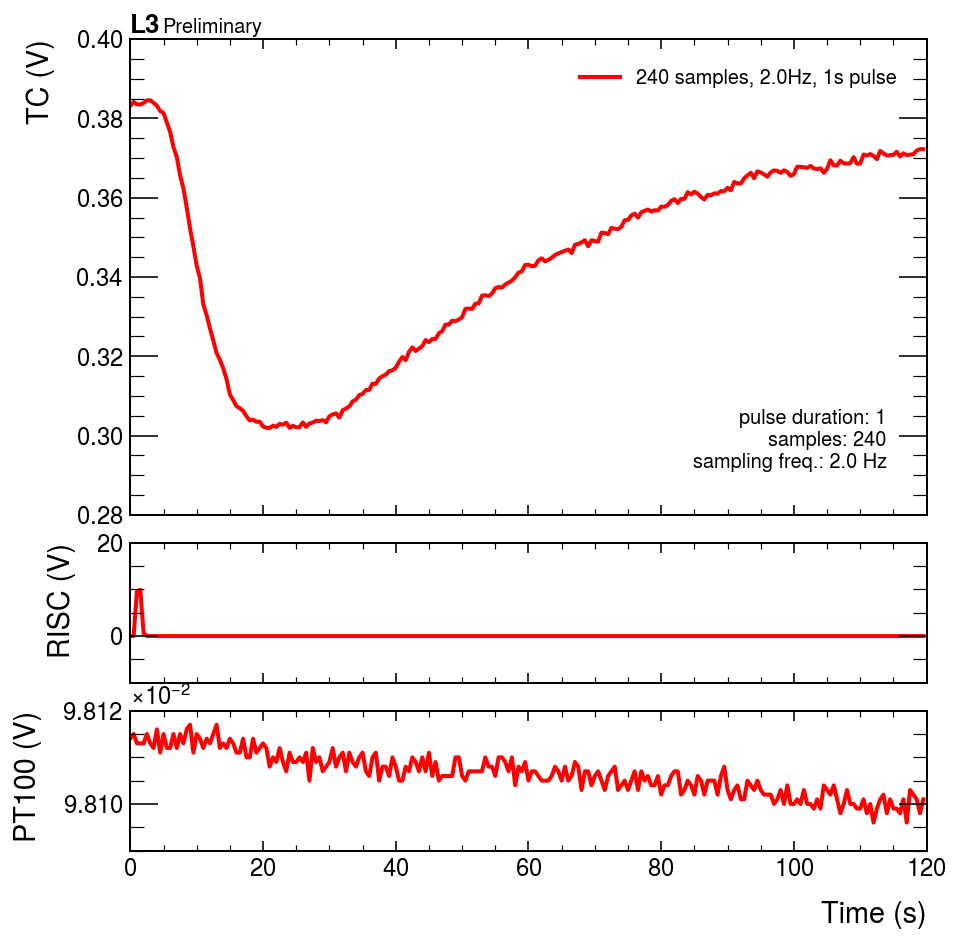

In [53]:
D3.prelim_plot()

In [45]:
class Analysis():
    def __init__(self, data: Data):
        self.data = data
    
    def T(self):
        data = self.data
        i_pt100 = 1/0.00095
        return 14e-4 * (data.PT100 * i_pt100)**2 + 2.2959 * data.PT100 * i_pt100 + 29.77

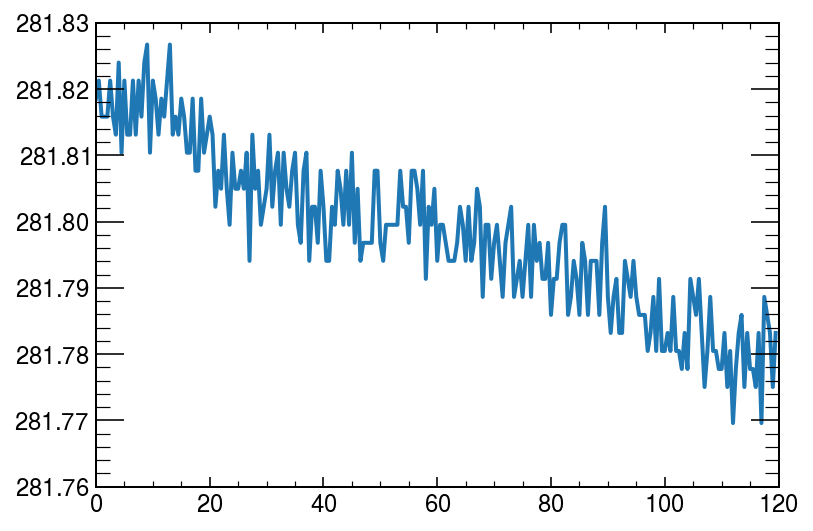

In [54]:
plt.plot(D3.time, Analysis(D3).T())